# Structurer un workflow pour le déployer en production

<img src="../images/workflow.png" alt="image workflow">

In [65]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [66]:
data = sns.load_dataset('tips')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [68]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [69]:
y = data['tip']

In [70]:
X = data.drop(columns=['tip'])

In [71]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lg = LinearRegression()

# Iteration 1 - categoric features (get_dummies)

In [74]:
X_train

,total_bill,sex,smoker,day,time,size
77,27.20,Male,No,Thur,Lunch,4
17,16.29,Male,No,Sun,Dinner,3
145,8.35,Female,No,Thur,Lunch,2
117,10.65,Female,No,Thur,Lunch,2
18,16.97,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...
214,28.17,Female,Yes,Sat,Dinner,3
107,25.21,Male,Yes,Sat,Dinner,2
11,35.26,Female,No,Sun,Dinner,4
30,9.55,Male,No,Sat,Dinner,2


In [75]:
y_train

77     4.00
17     3.71
145    1.50
117    1.50
18     3.50
       ... 
214    6.50
107    4.29
11     5.00
30     1.45
154    2.00
Name: tip, Length: 170, dtype: float64

In [76]:
#lg.fit(X_train, y_train)

In [77]:
X_train.sample(2)

,total_bill,sex,smoker,day,time,size
76,17.92,Male,Yes,Sat,Dinner,2
117,10.65,Female,No,Thur,Lunch,2


In [78]:
X_train_dummies = pd.get_dummies(X_train)

In [79]:
X_train_dummies.sample(2)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
174,16.82,2,1,0,1,0,0,0,0,1,0,1
79,17.29,2,1,0,0,1,1,0,0,0,1,0


In [80]:
lg_train = lg.fit(X_train_dummies, y_train)

In [81]:
X_test_dummies = pd.get_dummies(X_test)

In [82]:
lg_train.score(X_test_dummies, y_test)

0.5185474826843339

# Iteration 2 - categoric + numeric features

In [83]:
X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3)

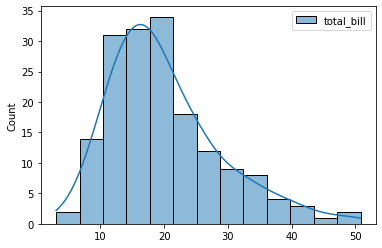

In [84]:
sns.histplot(data=X_train_2[["total_bill"]], kde=True);

<AxesSubplot:ylabel='Count'>

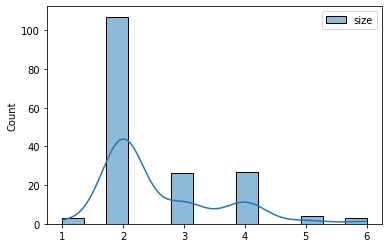

In [85]:
sns.histplot(data=X_train_2[["size"]], kde=True)

## Scaler

### Numerical features

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()
scaler.fit(X_train_2[["size","total_bill"]])
X_train_2_scaled = scaler.transform(X_train_2[["size","total_bill"]])

In [88]:
X_train_2_scaled_df = pd.DataFrame(X_train_2_scaled).rename(columns={0: "size_scaled", 1: "total_bill_scaled"})

In [89]:
X_train_2_scaled_df

,size_scaled,total_bill_scaled
0,0.4,0.315878
1,0.2,0.173439
2,0.6,0.281106
3,0.2,0.311060
4,1.0,0.502304
...,...,...
165,0.4,0.565354
166,0.6,0.498743
167,0.4,1.000000
168,0.2,0.187683


### Categorical Features

In [90]:
X_train_2[["sex","smoker","day","time"]].nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
ohe = OneHotEncoder()

In [93]:
ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

<170x10 sparse matrix of type '<class 'numpy.float64'>'
	with 680 stored elements in Compressed Sparse Row format>

In [94]:
X_train_2_ohe = ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [95]:

X_train_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_train_2_ohe)

In [96]:
X_train_2_ohe_df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [97]:
X_train_2_prep_df = pd.concat([X_train_2_ohe_df, X_train_2_scaled_df], axis=1)

In [98]:
X_train_2_prep_df

,0,1,2,3,4,5,6,7,8,9,size_scaled,total_bill_scaled
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4,0.315878
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2,0.173439
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6,0.281106
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.2,0.311060
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.502304
...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,0.565354
166,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6,0.498743
167,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,1.000000
168,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2,0.187683


In [99]:
lg_2 = LinearRegression()

In [100]:
lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [101]:
#===> Il faut scalé le X_test_2_prep_df. Avec la même methodologie que le X_train_2, sans faire de dataLeakeage. 
# ==> Creéer les methodes appropriées pour réutiliser la logique.


In [102]:
def to_scale(df,columns_list,standard=False) :
    
    if standard : scaler = StandardScaler()
    else : scaler = MinMaxScaler()
    
    scaler.fit(X_train_2[columns_list])
    df_scaled = scaler.transform(df[columns_list])

    return pd.DataFrame(df_scaled).rename(columns={i:f"{columns_list[i]}_scaled" for i in range(len(columns_list))})



In [103]:
def to_ohe(df,columns_list) :
    
    ohe = OneHotEncoder()
    ohe.fit(X_train_2[columns_list])
    df_ohe = ohe.transform(df[columns_list])

    return pd.DataFrame.sparse.from_spmatrix(df_ohe)


In [104]:
X_train_2_scaled = to_scale(X_train_2,['size','total_bill'],standard= False)
X_train_2_ohe = to_ohe(X_train_2,["sex","smoker","day","time"])
X_train_2_prep_df = pd.concat([X_train_2_ohe, X_train_2_scaled], axis=1)

X_test_2_scaled = to_scale(X_test_2,['size','total_bill'],standard= False)
X_test_2_ohe = to_ohe(X_test_2,["sex","smoker","day","time"])
X_test_2_prep_df = pd.concat([X_test_2_ohe, X_test_2_scaled], axis=1)

lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [105]:
# Afficher un nuage de point qui révéle les informations suivantes : y_true vs y_predict en fonction de total_bill

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


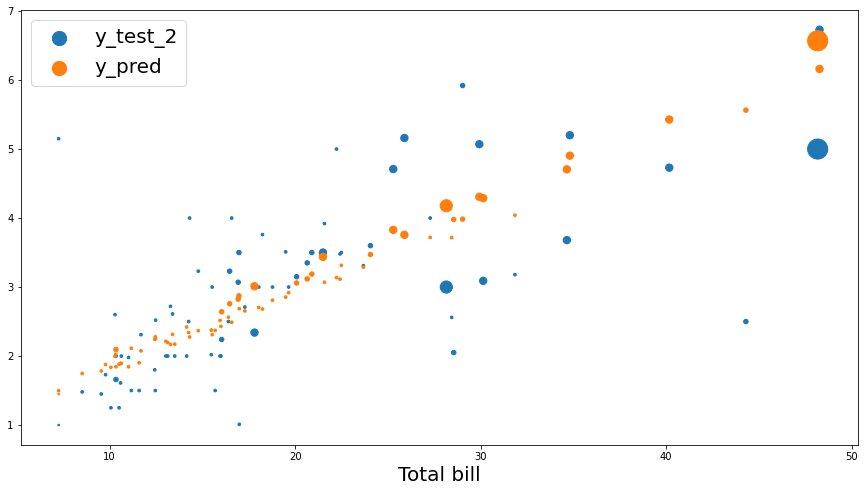

In [106]:

y_pred = lg_2.predict(X_test_2_prep_df)


plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred, label='y_pred', s=np.exp(X_test_2['size']))
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [107]:
# Re-testester avec un StandardScaler => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [108]:
X_test_2_scaled_std = to_scale(X_test_2,['size','total_bill'],standard= True)
X_test_2_ohe_std = to_ohe(X_test_2,["sex","smoker","day","time"])
X_test_2_prep_df_std = pd.concat([X_test_2_ohe_std, X_test_2_scaled_std], axis=1)

X_train_2_scaled_std = to_scale(X_train_2,['size','total_bill'],standard= True)
X_train_2_ohe_std = to_ohe(X_train_2,["sex","smoker","day","time"])
X_train_2_prep_df_std = pd.concat([X_train_2_ohe_std, X_train_2_scaled_std], axis=1)

lg_2.fit(X_train_2_prep_df_std,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


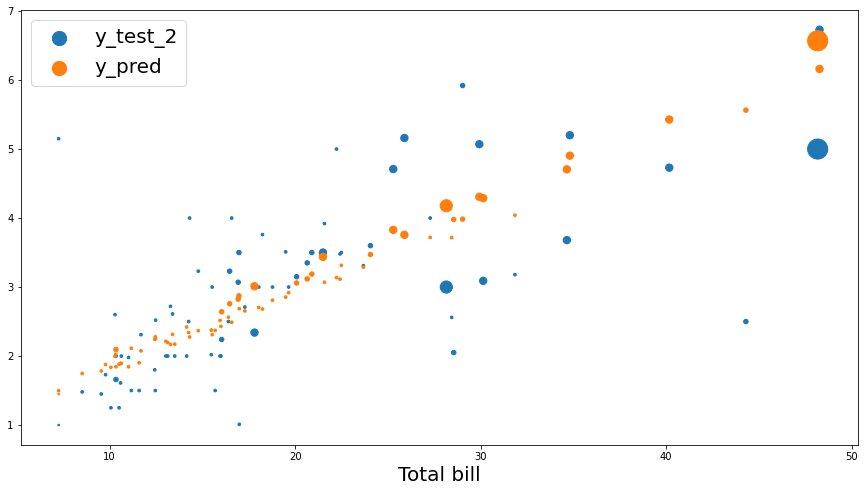

In [109]:

y_pred_std = lg_2.predict(X_test_2_prep_df_std)


plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred_std, label='y_pred', s=np.exp(X_test_2['size']))
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [110]:
lg_2.score(X_test_2_prep_df_std, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.4133166218537192

In [111]:
# Afficher l'hétéroscédasticité ou l'homoscédasticité des erreurs.

In [112]:
# Afficher la distribution des erreurs. (Normalité des erreus).

In [113]:
# Créer un package à l'aide https://pypi.org/project/setuptools/